<a href="https://colab.research.google.com/github/thinkisall/java/blob/main/keras_lstm_lotto_968_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 로또 번호 예측

- 딥러닝 로또 예측 번호 확인: https://animalface.site/lotto

- 동영상 설명: 유튜브 조코딩 채널(https://www.youtube.com/channel/UCQNE2JmbasNYbjGAcuBiRRg)

- 참고 문헌: 김태영님 블로그(https://tykimos.github.io/2020/01/25/keras_lstm_lotto_v895/)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.8.0-rc1
!pip install 'h5py==2.10.0' --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tensorboard-2.12.0:
      Successfully uni

In [ ]:
import numpy as np

rows = np.loadtxt("./lotto.csv", delimiter=",")
row_count = len(rows)
print(row_count)

1115


In [ ]:
import numpy as np

# 당첨번호를 원핫인코딩벡터(ohbin)으로 변환
def numbers2ohbin(numbers):

    ohbin = np.zeros(45) #45개의 빈 칸을 만듬

    for i in range(6): #여섯개의 당첨번호에 대해서 반복함
        ohbin[int(numbers[i])-1] = 1 #로또번호가 1부터 시작하지만 벡터의 인덱스 시작은 0부터 시작하므로 1을 뺌

    return ohbin

# 원핫인코딩벡터(ohbin)를 번호로 변환
def ohbin2numbers(ohbin):

    numbers = []

    for i in range(len(ohbin)):
        if ohbin[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가한다.
            numbers.append(i+1)

    return numbers

In [ ]:
numbers = rows[:, 1:7]
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count-1]
y_samples = ohbins[1:row_count]

#원핫인코딩으로 표시
print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

ohbins
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]


In [ ]:
train_idx = (0, 800)
val_idx = (801, 900)
test_idx = (901, len(x_samples))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 800), val: (801, 900), test: (901, 1114)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# 모델을 정의합니다.
model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 매 에포크마다 훈련과 검증의 손실 및 정확도를 기록하기 위한 변수
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []

    for i in range(train_idx[0], train_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)

        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)

        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함

        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

epoch    0 train acc 0.019 loss 0.409 val acc 0.051 loss 0.399
epoch    1 train acc 0.025 loss 0.396 val acc 0.051 loss 0.398
epoch    2 train acc 0.026 loss 0.394 val acc 0.051 loss 0.397
epoch    3 train acc 0.021 loss 0.391 val acc 0.040 loss 0.399
epoch    4 train acc 0.022 loss 0.387 val acc 0.030 loss 0.402
epoch    5 train acc 0.030 loss 0.382 val acc 0.020 loss 0.405
epoch    6 train acc 0.040 loss 0.377 val acc 0.030 loss 0.408
epoch    7 train acc 0.052 loss 0.372 val acc 0.051 loss 0.412
epoch    8 train acc 0.051 loss 0.366 val acc 0.051 loss 0.416
epoch    9 train acc 0.065 loss 0.360 val acc 0.030 loss 0.419
epoch   10 train acc 0.066 loss 0.353 val acc 0.030 loss 0.423
epoch   11 train acc 0.070 loss 0.345 val acc 0.030 loss 0.426
epoch   12 train acc 0.075 loss 0.337 val acc 0.030 loss 0.430
epoch   13 train acc 0.070 loss 0.329 val acc 0.020 loss 0.433
epoch   14 train acc 0.074 loss 0.319 val acc 0.020 loss 0.437
epoch   15 train acc 0.076 loss 0.310 val acc 0.020 los

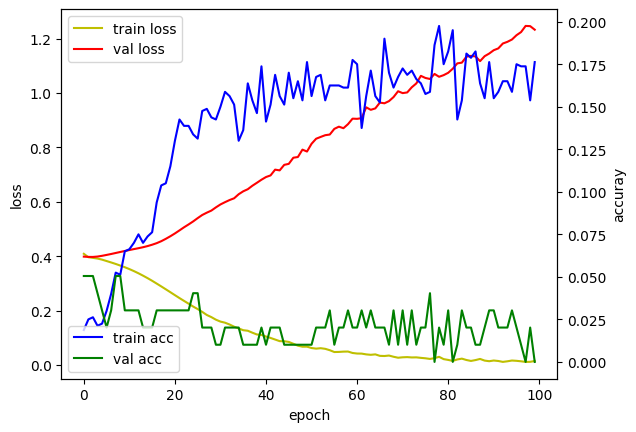

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 88회부터 지금까지 1등부터 5등까지 상금의 평균낸다.
mean_prize = [ np.mean(rows[87:, 8]),
           np.mean(rows[87:, 9]),
           np.mean(rows[87:, 10]),
           np.mean(rows[87:, 11]),
           np.mean(rows[87:, 12])]

print(mean_prize)

[2434034339.376459, 57151377.28501946, 1451075.5836575876, 52403.67509727627, 5000.0]


In [ ]:
# 등수와 상금을 반환함
# 순위에 오르지 못한 경우에는 등수가 0으로 반환함
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

In [ ]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:

        if len(selected_balls) == 6:
            break

        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [ ]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) # 모델의 출력값을 얻음

    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) # 6등까지 변수

    for n in range(10): # 10판 수행
        numbers = gen_numbers_from_probability(ys_pred[0])

        #i회차 입력 후 나온 출력을 i+1회차와 비교함
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers)

        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1

    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)

    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total')
print('==========')
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   5   0   4   1   0   0  12,176,028,402
[   2]   4   0   6   0   0   0   9,744,843,811
[   3]   6   0   4   0   0   0  14,610,010,338
[   4]   4   0   4   2   0   0   9,742,046,467
[   5]   3   1   4   2   0   0   7,365,163,505
[   6]   3   0   7   0   0   0   7,312,260,547
[   7]   5   0   3   1   0   1  12,174,577,327
[   8]   8   0   1   1   0   0  19,473,778,194
[   9]   2   0   7   1   0   0   4,878,278,611
[  10]   3   0   5   2   0   0   7,309,463,203
[  11]   3   0   7   0   0   0   7,312,260,547
[  12]   1   1   5   3   0   0   2,498,598,305
[  13]   5   0   4   1   0   0  12,176,028,402
[  14]   4   0   4   2   0   0   9,742,046,467
[  15]   1   0   6   2   0   1   2,442,845,600
[  16]   1   0   4   3   2   0   2,440,005,852
[  17]   0   1   7   2   0   0      67,413,713
[  18]   3   0   3   3   1   0   7,306,618,455
[  19]   2   0   5   3   0   0   4,875,481,267
[  20]   1   0   6   3   0   0   2,442,898,003
[  21]   2   0   4   

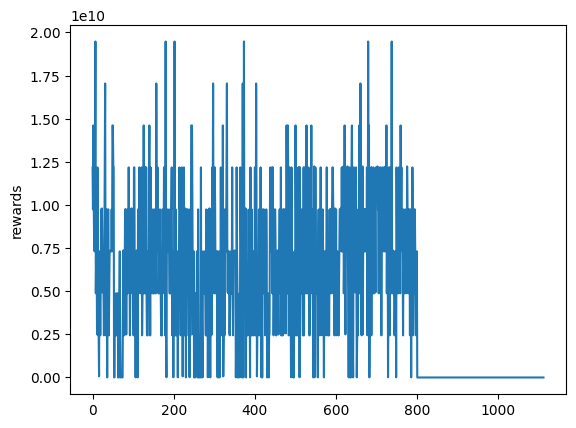

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

total_reward = train_total_reward + val_total_reward + test_total_reward

plt.plot(total_reward)
plt.ylabel('rewards')
plt.show()

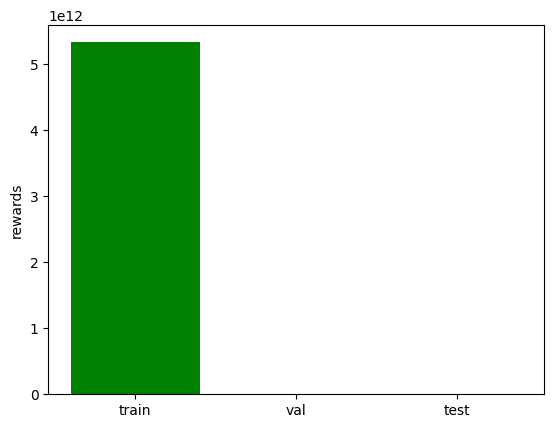

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

rewards = [sum(train_total_reward), sum(val_total_reward), sum(test_total_reward)]

class_color=['green', 'blue', 'red']

plt.bar(['train', 'val', 'test'], rewards, color=class_color)
plt.ylabel('rewards')
plt.show()

In [ ]:
# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    for i in range(len(x_samples)):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)

        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))

epoch    0 train acc 0.146 loss 0.179
epoch    1 train acc 0.141 loss 0.229
epoch    2 train acc 0.140 loss 0.231
epoch    3 train acc 0.144 loss 0.224
epoch    4 train acc 0.146 loss 0.214
epoch    5 train acc 0.147 loss 0.204
epoch    6 train acc 0.148 loss 0.196
epoch    7 train acc 0.149 loss 0.188
epoch    8 train acc 0.152 loss 0.181
epoch    9 train acc 0.154 loss 0.174
epoch   10 train acc 0.155 loss 0.169
epoch   11 train acc 0.156 loss 0.163
epoch   12 train acc 0.158 loss 0.158
epoch   13 train acc 0.159 loss 0.153
epoch   14 train acc 0.160 loss 0.149
epoch   15 train acc 0.160 loss 0.145
epoch   16 train acc 0.160 loss 0.141
epoch   17 train acc 0.162 loss 0.137
epoch   18 train acc 0.163 loss 0.134
epoch   19 train acc 0.163 loss 0.131
epoch   20 train acc 0.164 loss 0.128
epoch   21 train acc 0.164 loss 0.125
epoch   22 train acc 0.165 loss 0.123
epoch   23 train acc 0.166 loss 0.120
epoch   24 train acc 0.166 loss 0.118
epoch   25 train acc 0.166 loss 0.116
epoch   26 t

In [ ]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(50):
    numbers = gen_numbers_from_probability(ys_pred[0])
    numbers.sort()
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [11, 12, 14, 30, 33, 36]
1 : [5, 11, 14, 27, 36, 39]
2 : [11, 14, 28, 36, 38, 39]
3 : [11, 12, 14, 22, 36, 38]
4 : [11, 14, 26, 30, 38, 39]
5 : [17, 25, 26, 30, 36, 44]
6 : [9, 11, 14, 36, 38, 39]
7 : [11, 14, 30, 36, 38, 39]
8 : [11, 14, 30, 36, 38, 39]
9 : [9, 10, 26, 30, 39, 44]
10 : [6, 11, 14, 36, 38, 39]
11 : [4, 5, 14, 26, 36, 38]
12 : [9, 11, 14, 26, 29, 38]
13 : [3, 11, 14, 30, 31, 38]
14 : [10, 11, 14, 30, 36, 38]
15 : [11, 12, 14, 30, 36, 38]
16 : [9, 14, 24, 26, 36, 38]
17 : [11, 14, 36, 38, 39, 45]
18 : [11, 14, 30, 38, 39, 44]
19 : [11, 12, 36, 38, 39, 43]
20 : [11, 14, 30, 38, 39, 42]
21 : [9, 11, 26, 30, 36, 38]
22 : [11, 14, 20, 36, 38, 39]
23 : [5, 11, 36, 38, 39, 43]
24 : [5, 11, 14, 30, 36, 38]
25 : [7, 11, 14, 30, 36, 38]
26 : [14, 20, 26, 30, 36, 38]
27 : [11, 14, 15, 29, 38, 39]
28 : [3, 14, 20, 26, 36, 38]
29 : [11, 14, 30, 38, 39, 41]
30 : [11, 14, 26, 30, 38, 39]
31 : [6, 9, 11, 14, 38, 44]
32 : [2, 10, 14, 30, 38, 39]
33 : [11, 26, 30, 38,

- 딥러닝 로또 예측 번호 확인: https://animalface.site/lotto

- 동영상 설명: 유튜브 조코딩 채널(https://www.youtube.com/channel/UCQNE2JmbasNYbjGAcuBiRRg)

- 참고 문헌: 김태영님 블로그(https://tykimos.github.io/2020/01/25/keras_lstm_lotto_v895/)